# Titanic Project predicting survivors

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline


## 1. Load Data

In [4]:
test=pd.read_csv(r'C:\Users\jomondi\Desktop\Data Analytics\Python\Titanic\test.csv')
train=pd.read_csv(r'C:\Users\jomondi\Desktop\Data Analytics\Python\Titanic\train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [113]:
# Target or label is Survived
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Explore the Data

In [7]:
train.shape

(891, 12)

In [6]:
test.shape

(418, 11)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [117]:
# From this we can see that about 30% survived the titanic disaster
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 3. Data wrangling & cleaning

In [118]:
# Let's look at null values and % of nulls
missing=train.isna().sum().sort_values(ascending=False)
percent_1 = train.isnull().sum()/train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([missing, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


 #### -We need to drop the Cabin column, Embarked can easily be filled, Age needs a little more analysis



In [119]:
# COlumn names in the Dataset
train.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [120]:
# Drop Cabin feature to remove the blanks from 
test=test.drop(['Cabin'],axis=1)
train=train.drop(['Cabin'],axis=1)


In [126]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [127]:
# To understand the 'Embarked' column statistics to determine the best way to fill the nulls in 'Embarked'
train['Embarked'].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

In [128]:
# fill Embarked attribute with the mode of the attribute
common_value='S'
data=[train,test]
for dataset in data:
    dataset['Embarked']=dataset['Embarked'].fillna(common_value)

In [35]:
# Categorical, Object data types: Name, Sex, Ticket

In [129]:
# Convert Fare from float to integers
data = [train, test]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [130]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare             int32
Embarked        object
dtype: object

In [131]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8,S


In [132]:
# Drop the 'Name' attribute
test.drop(['Name'],axis=1,inplace=True)
train.drop(['Name'],axis=1,inplace=True)

In [133]:
# Convert 'Sex' attribute to integer dtype
gender={'male':0,'female':1}

data=[train,test]

for dataset in data:
    dataset['Sex']=dataset['Sex'].map(gender)

In [134]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare             int32
Embarked        object
dtype: object

In [135]:
train['Ticket'].describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

#### -Too many unique values in Ticket attribute making it tricky to convert into useful categories so we need to drop the "Ticket" attribute

In [136]:
# Drop the "Ticket" attribute

train=train.drop(['Ticket'], axis=1)
test=test.drop(['Ticket'], axis=1)

In [137]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7,S
1,2,1,1,1,38.0,1,0,71,C
2,3,1,3,1,26.0,0,0,7,S
3,4,1,1,1,35.0,1,0,53,S
4,5,0,3,0,35.0,0,0,8,S


In [138]:
# value counts of unique elements in 'Embarked'

train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [139]:
# Convert 'Embarked' into numerical values
embar={'S':1,'C':2,'Q':3}

data=[train,test]

for dataset in data:
    dataset['Embarked']=dataset['Embarked'].map(embar)

In [140]:
test.dtypes

PassengerId      int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare             int32
Embarked         int64
dtype: object

#### -Creating new categories for the 'Fare' & 'Age' Attribute

For the ‘Fare’ feature, we need to do the same as with the ‘Age’ feature. But it isn’t that easy, because if we cut the range of the fare values into a few equally big categories, 80% of the values would fall into the first category. Fortunately, we can use sklearn “qcut()” function, that we can use to see, how we can form the categories.

##### Create 'Age' categories for easy allocation to numerical values

In [143]:
data = [train, test]
for dataset in data:
    dataset['Age']= dataset['Age'].fillna(0)
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [144]:
train['Age'].value_counts()

0    245
6    148
4    126
3    106
5    103
2     92
1     71
Name: Age, dtype: int64

In [146]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,2,1,0,7,1
1,2,1,1,1,5,1,0,71,2
2,3,1,3,1,3,0,0,7,1
3,4,1,1,1,5,1,0,53,1
4,5,0,3,0,5,0,0,8,1


In [153]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,2,1,0,0,1
1,2,1,1,1,5,1,0,3,2
2,3,1,3,1,3,0,0,0,1
3,4,1,1,1,5,1,0,3,1
4,5,0,3,0,5,0,0,1,1


##### Create 'Fare' categories for easy allocation to numerical values

In [147]:
data = [train, test]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [148]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,5,0,0,0,3
1,893,3,1,6,1,0,0,1
2,894,2,0,6,0,0,1,3
3,895,3,0,3,0,0,1,1
4,896,3,1,2,1,1,1,1


#### Creating new features

In [154]:
# 1. Age times Class

data=[train, test]

for dataset in data:
    dataset['Age_class']=dataset['Age']* dataset['Pclass']

In [155]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_class
0,1,0,3,0,2,1,0,0,1,6
1,2,1,1,1,5,1,0,3,2,5
2,3,1,3,1,3,0,0,0,1,9
3,4,1,1,1,5,1,0,3,1,5
4,5,0,3,0,5,0,0,1,1,15


In [157]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_class
0,892,3,0,5,0,0,0,3,15
1,893,3,1,6,1,0,0,1,18
2,894,2,0,6,0,0,1,3,12
3,895,3,0,3,0,0,1,1,9
4,896,3,1,2,1,1,1,1,6


## 4. Building ML models

In [164]:
X_train=train.drop(['Survived','PassengerId'], axis=1)
Y_train=train['Survived']
X_test= test.drop(['PassengerId'],axis=1)


In [167]:
print(X_train.head())

   Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  Age_class
0       3    0    2      1      0     0         1          6
1       1    1    5      1      0     3         2          5
2       3    1    3      0      0     0         1          9
3       1    1    5      1      0     3         1          5
4       3    0    5      0      0     1         1         15


In [169]:
print(X_test.head())

   Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  Age_class
0       3    0    5      0      0     0         3         15
1       3    1    6      1      0     0         1         18
2       2    0    6      0      0     1         3         12
3       3    0    3      0      0     1         1          9
4       3    1    2      1      1     1         1          6


In [209]:
from sklearn import linear_model
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

### 4.1 Stochastic Gradient Descent (SGD):

In [175]:
# Train the SGD model

sgd=SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train,Y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=None,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [199]:
Y_pred = sgd.predict(X_test)
acc_sgd=round(sgd.score(X_train, Y_train)*100,2)
acc_sgd

69.58

### 4.2 Random Forest:

In [189]:
# Train the random forest classifier

random_forest=RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [201]:
Y_prediction=random_forest.predict(X_test)
acc_rdf=round(random_forest.score(X_train,Y_train)*100,2)
acc_rdf

90.57

### 4.3 Logistic Regression:

In [192]:
# Train the logistic regression Model

Logreg= LogisticRegression()
Logreg.fit(X_train,Y_train)

C:\Users\jomondi\AppData\Local\Continuum\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [203]:
Y_pred=Logreg.predict(X_test)
acc_log=round(Logreg.score(X_train, Y_train)*100,2)
acc_log

79.35

### 4.4 K Nearest Neighbor:

In [204]:
# Train the KNN Model

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [206]:
knn_predict= knn.predict(X_test)
acc_knn=round(knn.score(X_train,Y_train)*100,2)
acc_knn

86.76

### 4.5 Gaussian Naive Bayes:

In [207]:
# Train GNB Model

gnb=GaussianNB()
gnb.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [212]:
gnb_predict=gnb.predict(X_test)
acc_gnb=round(gnb.score(X_train,Y_train)*100,2)
acc_gnb

78.34

### 4.6 Linear Support Vector Machine:

In [214]:
# Train the SVM Model

svc= LinearSVC()
svc.fit(X_train,Y_train)

C:\Users\jomondi\AppData\Local\Continuum\anaconda3\anaconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [218]:
svc_predict=svm.predict(X_test)
acc_svc=round(svm.score(X_train,Y_train)*100,2)
acc_svc

79.12

### 4.7 Decision Tree

In [219]:
# Train the decision tree model

decision_tree= DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [224]:
decision_tree_predict=decision_tree.predict(X_test)
acc_decision_tree=round(decision_tree.score(X_train,Y_train)*100,2)
acc_decision_tree

90.57

### 4.8 Which is the best Model ?

In [225]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_rdf, acc_gnb, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
90.57,Random Forest
90.57,Decision Tree
86.76,KNN
79.35,Logistic Regression
79.12,Support Vector Machines
78.34,Naive Bayes
69.58,Stochastic Gradient Decent


##### As we can see, the Random Forest classifier goes on the first place. But first, let us check, how random-forest performs, when we use cross validation.

In [226]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.74444444 0.8        0.76404494 0.85393258 0.87640449 0.85393258
 0.82022472 0.78651685 0.83146067 0.82954545]
Mean: 0.8160506752922483
Standard Deviation: 0.03988932249576389


In [227]:
# Using Random forest to measure the importance of each attribute( feature)

importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Sex,0.342
Fare,0.138
Age_class,0.109
Pclass,0.103
SibSp,0.089
Age,0.085
Parch,0.074
Embarked,0.060


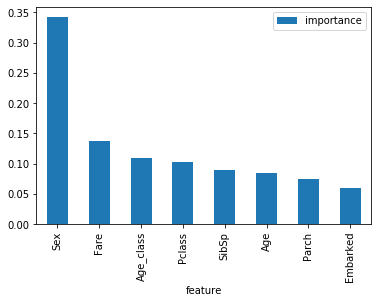

In [228]:
importances.plot.bar()

##### Evaluate Random Forest using the out-of-bag samples to estimate the generalization accuracy. I will not go into details here about how it works. Just note that out-of-bag estimate is as accurate as using a test set of the same size as the training set. Therefore, using the out-of-bag error estimate removes the need for a set aside test set



In [232]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

90.57 %


In [233]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 80.7 %


## 5. Hyperparameter Tuning

## 6. Further Evaluation

#### Confusion Matrix

In [248]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_predict

predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
predictions[:10] # first 10 predictions

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [238]:
confusion_matrix(Y_train,predictions)

array([[474,  75],
       [104, 238]], dtype=int64)

In [250]:
print("Precision_score: ", precision_score(Y_train,predictions))
print("Recall: ", recall_score(Y_train,predictions))
print("Accruacy_score: ", accuracy_score(Y_train,predictions))
print("F_score: ", f1_score(Y_train, predictions))

Precision_score:  0.7531645569620253
Recall:  0.695906432748538
Accruacy_score:  0.7957351290684624
F_score:  0.723404255319149


#### Precision Recall Curve

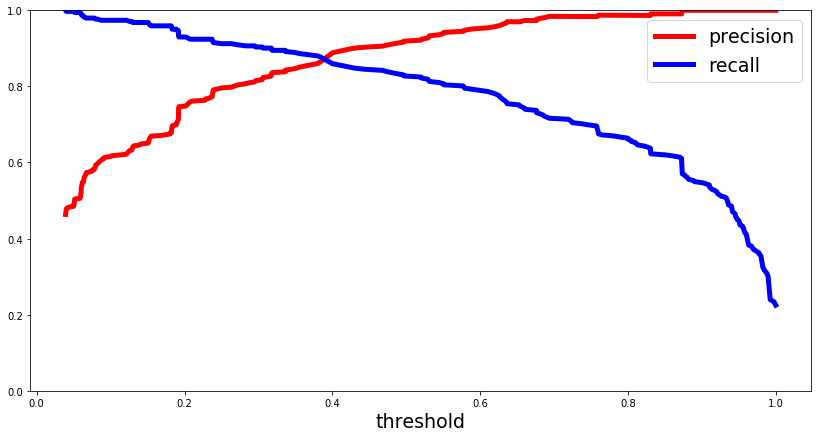

In [251]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

#### Above you can clearly see that the recall is falling of rapidly at a precision of around 83%. Because of that you may want to select the precision/recall tradeoff before that — maybe at around 75 %. 

You are now able to choose a threshold, that gives you the best precision/recall tradeoff for your current machine learning problem. If you want for example a precision of 80%, you can easily look at the plots and see that you would need a threshold of around 0.4. Then you could train a model with exactly that threshold and would get the desired accuracy.

#### ROC AUC Curve

Another way to evaluate and compare your binary classifier is provided by the ROC AUC Curve. This curve plots the true positive rate (also called recall) against the false positive rate (ratio of incorrectly classified negative instances), instead of plotting the precision versus the recall.

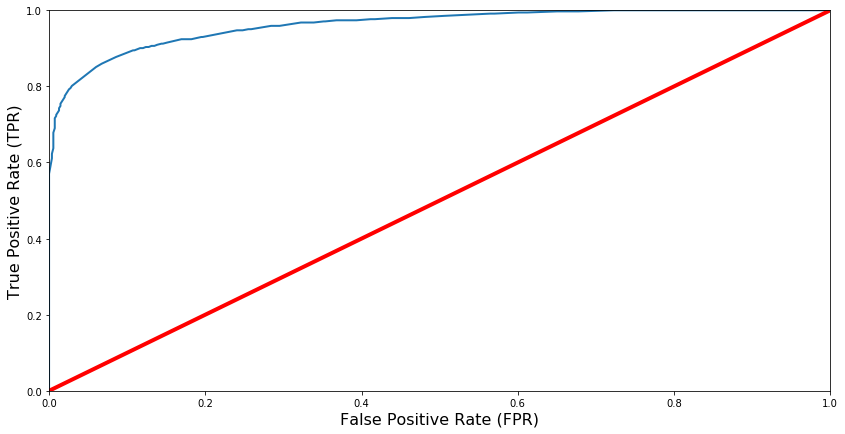

In [252]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [253]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9612160334047017
